In [468]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [469]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Muninn format

In [481]:
res=1
vars=["m", "beta", "psi", "derpsi"]
time=[]
mori=[]
mscri=[]
betaori=[]
betascri=[]
psiori=[]
psiscri=[]
derpsiori=[]
derpsiscri=[]
k=1

for var in vars:
    
    
    #dir = "/home/rita13santos/Desktop/este/{}.txt".format(var)
    dir = "/home/rita13santos/Desktop/run36/{}.txt".format(var)
    #26sep/run21
    
    print(dir)

    with open(dir) as f:
        i=0
        for line in f:
            i=i+1
            a=line.split()
            #print("i = ", i, " a = ", a)
            
            
            
            #a=line.split()
            
            if k==1:
                time.append(float(a[0]))
                mori.append(float(a[1]))
                mscri.append(float(a[2]))
            elif k==2:
                betaori.append(float(a[1]))
                betascri.append(float(a[2]))
            elif k==3:
                psiori.append(float(a[1]))
                psiscri.append(float(a[2]))
            elif k==4:
                derpsiori.append(float(a[1]))
                derpsiscri.append(float(a[2]))
                
                
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/run36/m.txt
/home/rita13santos/Desktop/run36/beta.txt
/home/rita13santos/Desktop/run36/psi.txt
/home/rita13santos/Desktop/run36/derpsi.txt


####

# Styling plots

In [482]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Convert central to Bondi time

In [483]:

#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

#convert central time to bondi time
def converttobondi(time, betascri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(betascri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,betascri)

# Phi at origin

Value of Derpsi at the origin over time

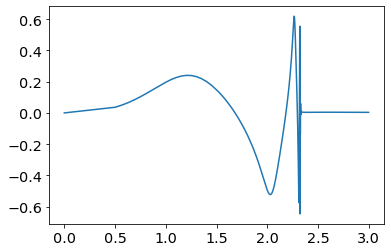

In [484]:
plt.plot(time, derpsiori)

Finding zero crossings

In [491]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derpsiori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
print(roots[k:(k+3)+1])

k=3
tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
print("\nTau star is ", tau_star)
print("Tau* is u* in my report") #all my times tau (proper time) and substituted by u

Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
print("\nDelta is ", Delta)

Number of zero crossing is  11
[2.18378668 2.29681481 2.31597616 2.32087624]

Tau star is  2.322949721065589
Tau* is u* in my report

Delta is  2.642293059560614


In [492]:
#tau_star=(2.043731069021225+2.043599047731676)/2

In [493]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log((tau_star-x)/tau_star))

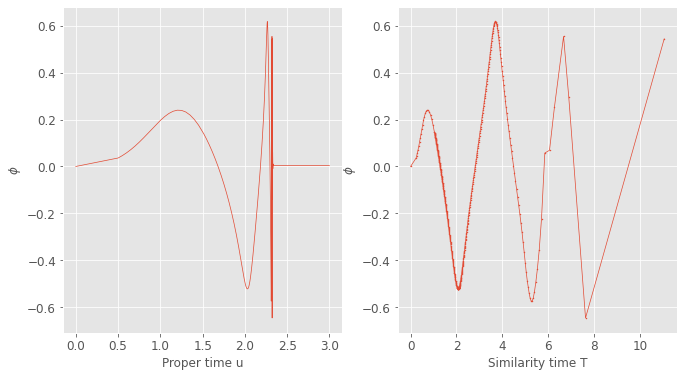

In [494]:
with plt.style.context('ggplot'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,derpsiori,linewidth=0.7)
    #ax1.scatter(time,derpsiori,s=0.1)
    ax1.set_xlabel("Proper time u")#$\u03C4$")
    ax1.set_ylabel("$\phi$")#("$\partial_x \psi$")
    #ax1.set_xlim([2.04,2.05])
    
    ax2.plot(adapt_time,derpsiori[0:len(adapt_time)],linewidth=0.7)
    ax2.scatter(adapt_time,derpsiori[0:len(adapt_time)],s=0.9)
    ax2.set_xlabel("Similarity time T")#"Adapted time T")
    ax2.set_ylabel("$\phi$")
    
    
    
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

News function

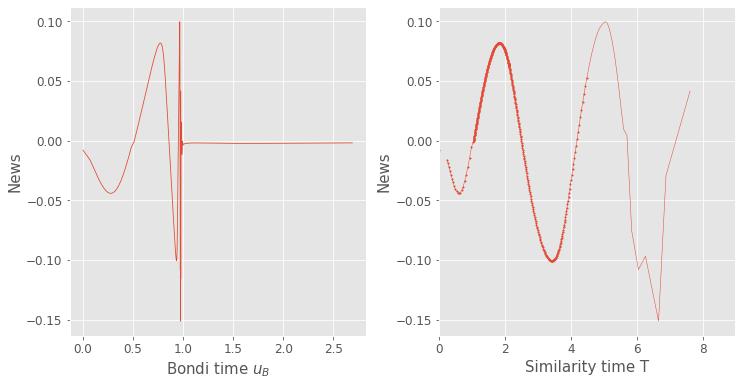

In [478]:
news=[]
for i in range(0, len(psiscri)-1):
    new=np.exp(-2*betascri[i])*(psiscri[i+1]-psiscri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    news.append(new)

    
with plt.style.context('ggplot'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    #ax1.scatter(bonditime[0:len(news)],news,s=0.5)
    ax1.plot(bonditime[0:len(news)-10],news[0:len(news)-10],linewidth=0.8)
    ax1.set_xlabel("Bondi time $u_B$",fontsize=15)#$\u03C4$")
    ax1.set_ylabel("News",fontsize=15)
    
    ax2.scatter(adapt_time[0:len(adapt_time)-31],news[0:len(adapt_time)-31],s=2)
    ax2.plot(adapt_time[1:len(adapt_time)-1],news[1:len(adapt_time)-1],linewidth=0.5)
    ax2.set_xlabel("Similarity time T",fontsize=15)#Adapted time T")
    fig.tight_layout(pad=3.0)
    ax2.set_ylabel("News",fontsize=15)
    plt.xlim([0,9])
    
    
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

$\beta$ at scri+

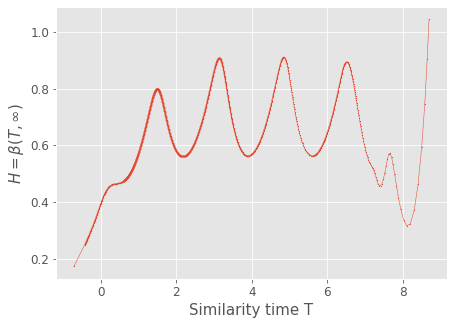

In [224]:
tau_star=(2.043599047731676)
adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))
        
        
with plt.style.context('ggplot'):
    
    #plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)  
    plt.xlabel("Similarity time T", fontsize=15)#T
    plt.ylabel(r'$H = \beta (T,\infty)$', fontsize=15)#H = β(uC , ∞) 
    #plt.plot(bonditime,betascri,linewidth=0.5)
    #plt.scatter(bonditime[0:len(bonditime)-1],betascri[0:len(bonditime)-1],s=0.5)
    plt.scatter(adapt_time[0:len(adapt_time)-14],betascri[0:len(adapt_time)-14],s=0.5)
    plt.plot(adapt_time[0:len(adapt_time)-14],betascri[0:len(adapt_time)-14],linewidth=0.5)
    #plt.plot(adapt_time,mplt[0:len(adapt_time)],linewidth=0.5)
    #plt.xlim([0,1.])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

Bondi mass at scri+

ValueError: x and y must be the same size

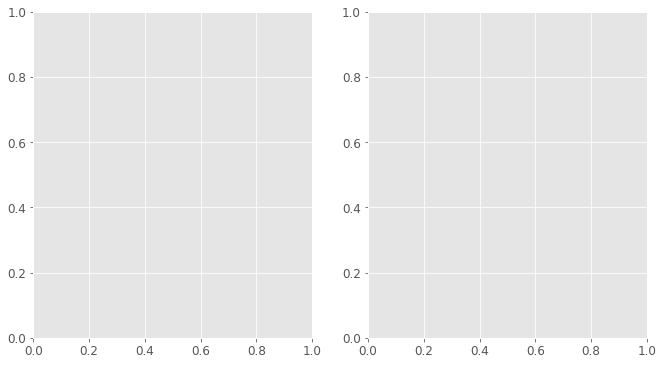

In [207]:
mplt=[]
for i in range(0, len(mscri)):
    mplt.append(mscri[i]) #saving derpsi at the origin for each timestep

with plt.style.context('ggplot'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    
    
    
    
    # time
    ax1.scatter(bonditime,mplt,s=0.5)
    ax1.plot(bonditime,mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass")
    #ax1.set_xlim([.8,1.04])
    #ax1.set_ylim([-0.001,0.002])
    ax1.set_yscale('log')
    #ax1.set_xlabel("$\u03C4$")#T
    ax1.set_xlabel("Bondi time $u_B$")#$\u03C4$")
    
    # adapt time
    
    ax2.plot(adapt_time,np.array(mplt[0:len(adapt_time)]),linewidth=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([2.55,2.6])
    #ax2.set_ylim([-0.001,0.001])
    ax2.set_ylabel("Bondi mass")
    ax2.set_xlabel("T")
    
    plt.show()